ANÁLISE EXPLORATÓRIA + PIPELINE

In [241]:
#Importar bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import joblib  # para salvar o modelo

In [242]:
#Carregar dados
df = pd.read_csv("C:/Users/camil/OneDrive/Área de Trabalho/Pessoal/Pós Graduação/Fase 4/Obesity.csv")

In [243]:
#Renomear Colunas

renomear_colunas = {
    'Gender': 'genero',
    'Age': 'idade',
    'Height': 'altura',
    'Weight': 'peso',
    'family_history': 'historico_familiar',
    'FAVC': 'frequencia_alimentos_caloricos',
    'FCVC': 'consumo_vegetais',
    'NCP': 'qtd_refeicoes_diarias',
    'CAEC': 'lanches_entre_refeicoes',
    'SMOKE': 'fumante',
    'CH2O': 'consumo_agua',
    'SCC': 'monitora_calorias',
    'FAF': 'frequencia_atividade_fisica',
    'TUE': 'tempo_tecnologia',
    'CALC': 'frequencia_alcool',
    'MTRANS': 'transporte',
    'Obesity': 'nivel_obesidade' 
}

df.rename(columns=renomear_colunas, inplace=True)

In [244]:
#Verificar nulos
df.isnull().sum().sum()

0

In [245]:
#Analise Estatística
df.describe()

,idade,altura,peso,consumo_vegetais,qtd_refeicoes_diarias,consumo_agua,frequencia_atividade_fisica,tempo_tecnologia
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [246]:
#Alterando as colunas que estão com texto para número
colunas_binarias = ['historico_familiar', 'frequencia_alimentos_caloricos', 'fumante', 'monitora_calorias']

# Transformando yes/no em 1/0 de forma robusta
for col in colunas_binarias:
    # Converter para string, remover espaços e colocar em lowercase
    df[col] = df[col].astype(str).str.strip().str.lower()
    # Substituir valores yes/no por 1/0
    df[col] = df[col].replace({'yes': 1, 'no': 0})


C:\Users\camil\AppData\Local\Temp\ipykernel_25648\2221957499.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'yes': 1, 'no': 0})
C:\Users\camil\AppData\Local\Temp\ipykernel_25648\2221957499.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'yes': 1, 'no': 0})
C:\Users\camil\AppData\Local\Temp\ipykernel_25648\2221957499.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

In [247]:
#Analise Estatística
df.describe()

,idade,altura,peso,historico_familiar,frequencia_alimentos_caloricos,consumo_vegetais,qtd_refeicoes_diarias,fumante,consumo_agua,monitora_calorias,frequencia_atividade_fisica,tempo_tecnologia
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,0.020843,2.008011,0.045476,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.142893,0.612953,0.208395,0.850592,0.608927
min,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,0.000000,1.584812,0.000000,0.124505,0.000000
50%,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,0.000000,2.000000,0.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,0.000000,2.477420,0.000000,1.666678,1.000000
max,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,1.000000,3.000000,1.000000,3.000000,2.000000


In [248]:
# Lista das colunas
colunas_inteiras = [
    'historico_familiar',
    'frequencia_alimentos_caloricos',
    'consumo_vegetais',
    'qtd_refeicoes_diarias',
    'fumante',
    'consumo_agua',
    'monitora_calorias',
    'frequencia_atividade_fisica',
    'tempo_tecnologia'
]

# Arredondar e converter para inteiro
df[colunas_inteiras] = df[colunas_inteiras].round(0).astype(int)


In [249]:
#Analise Estatística
df.describe()

,idade,altura,peso,historico_familiar,frequencia_alimentos_caloricos,consumo_vegetais,qtd_refeicoes_diarias,fumante,consumo_agua,monitora_calorias,frequencia_atividade_fisica,tempo_tecnologia
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,0.817622,0.883941,2.423496,2.687826,0.020843,2.014685,0.045476,1.006632,0.664614
std,6.345968,0.093305,26.191172,0.386247,0.320371,0.583905,0.809680,0.142893,0.688616,0.208395,0.895462,0.674009
min,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,22.777890,1.700499,83.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000,0.000000,1.000000,1.000000
75%,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,0.000000,2.000000,0.000000,2.000000,1.000000
max,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,1.000000,3.000000,1.000000,3.000000,2.000000


In [250]:
#Alterando as colunas que estão com texto para número
#Converte para string
df['lanches_entre_refeicoes'] = df['lanches_entre_refeicoes'].astype(str).str.strip().str.lower()
df['frequencia_alcool'] = df['frequencia_alcool'].astype(str).str.strip().str.lower()


In [251]:
#Alterando as colunas que estão com texto para número
mapa_frequencia_1 = {
    'no': 1,
    'sometimes': 2,
    'frequently': 3,
    'always': 4
}

df['lanches_entre_refeicoes'] = df['lanches_entre_refeicoes'].map(mapa_frequencia_1)
df['frequencia_alcool'] = df['frequencia_alcool'].map(mapa_frequencia_1)

In [252]:
#Criar coluna IMC: 
df["IMC"]= df["peso"] / (df["altura"] ** 2)

df["IMC"] = df["IMC"].round(2)

In [253]:
#Criar coluna de classificação do IMC
df["classificacao"] = pd.cut(
    df["IMC"],
    bins=[0, 18.5, 24.9, 29.9, float("inf")],
    labels=["Abaixo do peso", "Peso normal", "Sobrepeso", "Obesidade"]
)

df["nm_classificacao"] = df["classificacao"].map({
    "Abaixo do peso": 0,
    "Peso normal": 1,
    "Sobrepeso": 2,
    "Obesidade": 3
})

In [254]:
#Analise Estatística
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   genero                          2111 non-null   object  
 1   idade                           2111 non-null   float64 
 2   altura                          2111 non-null   float64 
 3   peso                            2111 non-null   float64 
 4   historico_familiar              2111 non-null   int32   
 5   frequencia_alimentos_caloricos  2111 non-null   int32   
 6   consumo_vegetais                2111 non-null   int32   
 7   qtd_refeicoes_diarias           2111 non-null   int32   
 8   lanches_entre_refeicoes         2111 non-null   int64   
 9   fumante                         2111 non-null   int32   
 10  consumo_agua                    2111 non-null   int32   
 11  monitora_calorias               2111 non-null   int32   
 12  frequencia_atividade

In [255]:
print(df.columns)

Index(['genero', 'idade', 'altura', 'peso', 'historico_familiar',
       'frequencia_alimentos_caloricos', 'consumo_vegetais',
       'qtd_refeicoes_diarias', 'lanches_entre_refeicoes', 'fumante',
       'consumo_agua', 'monitora_calorias', 'frequencia_atividade_fisica',
       'tempo_tecnologia', 'frequencia_alcool', 'transporte',
       'nivel_obesidade', 'IMC', 'classificacao', 'nm_classificacao'],
      dtype='object')


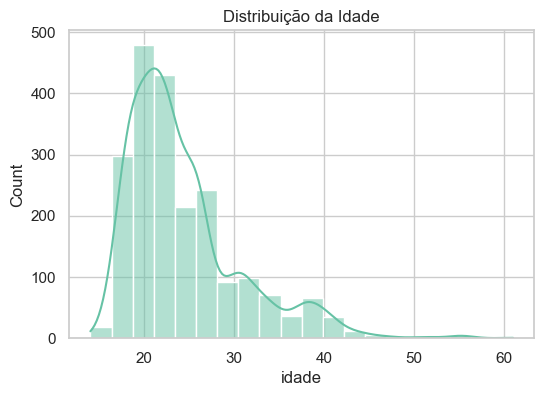

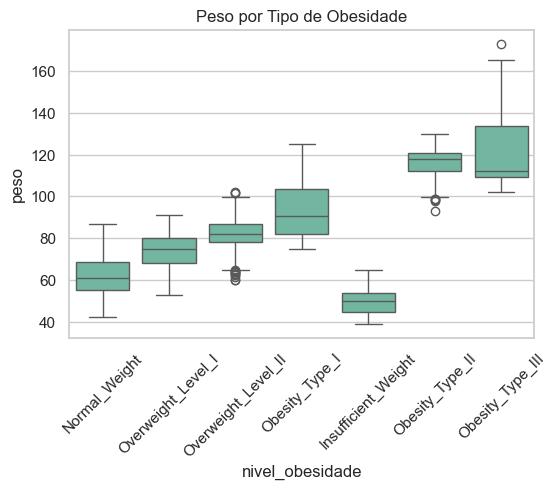

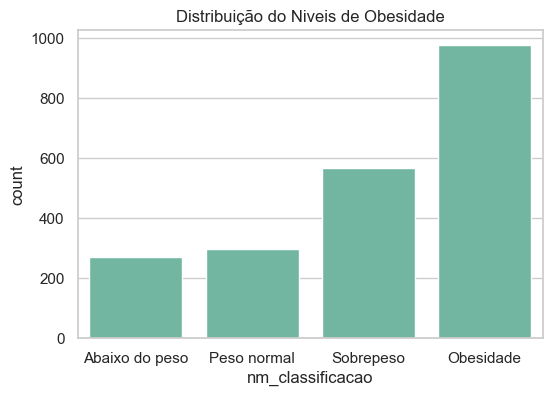

In [256]:
#Visualizações iniciais
sns.set(style="whitegrid", palette="Set2")

plt.figure(figsize=(6,4))
sns.histplot(df["idade"], bins=20, kde=True)
plt.title("Distribuição da Idade")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="nivel_obesidade", y="peso", data=df)
plt.title("Peso por Tipo de Obesidade")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x="nm_classificacao", data=df)
plt.title("Distribuição do Niveis de Obesidade")
plt.xticks([0,1,2,3], ["Abaixo do peso", "Peso normal", "Sobrepeso", "Obesidade"])
plt.show()



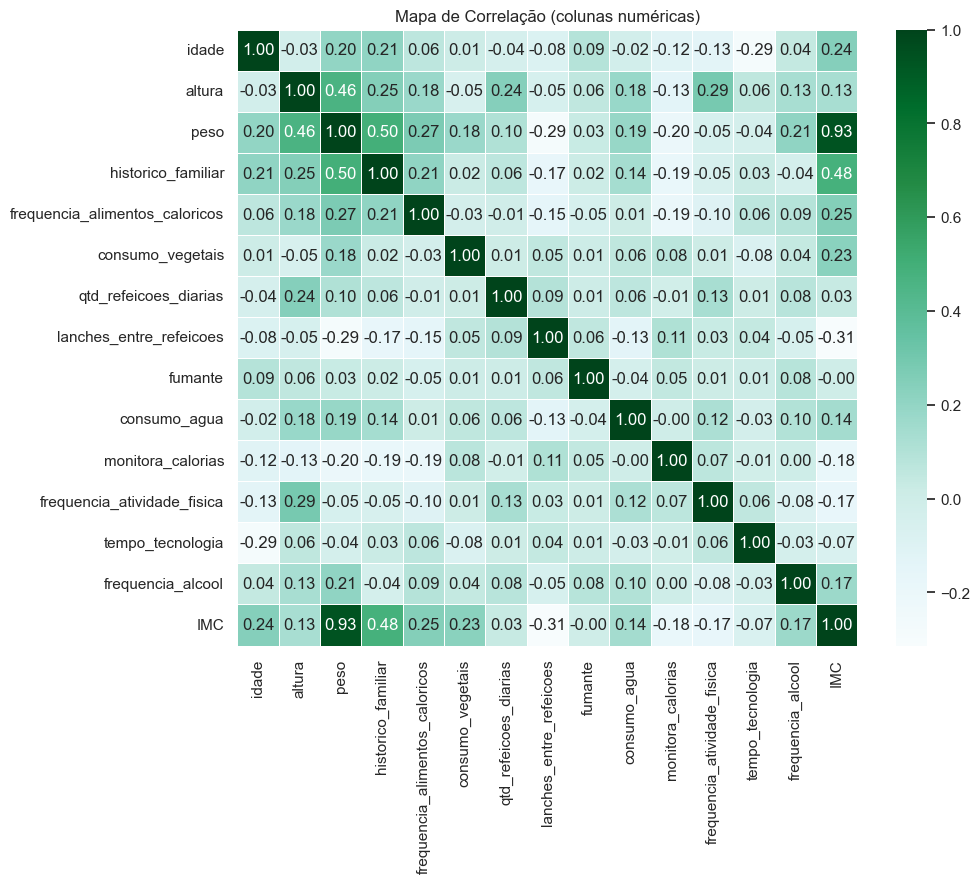

In [257]:
# seleciona apenas colunas numéricas
numericas = df.select_dtypes(include='number')

# calcula a correlação
corr = numericas.corr()

# plota o mapa de correlação
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="BuGn", linewidths=0.5)
plt.title("Mapa de Correlação (colunas numéricas)")
plt.show()

In [258]:
df.head()

,genero,idade,altura,peso,historico_familiar,frequencia_alimentos_caloricos,consumo_vegetais,qtd_refeicoes_diarias,lanches_entre_refeicoes,fumante,consumo_agua,monitora_calorias,frequencia_atividade_fisica,tempo_tecnologia,frequencia_alcool,transporte,nivel_obesidade,IMC,classificacao,nm_classificacao
0,Female,21.0,1.62,64.0,1,0,2,3,2,0,2,0,0,1,1,Public_Transportation,Normal_Weight,24.39,Peso normal,1
1,Female,21.0,1.52,56.0,1,0,3,3,2,1,3,1,3,0,2,Public_Transportation,Normal_Weight,24.24,Peso normal,1
2,Male,23.0,1.80,77.0,1,0,2,3,2,0,2,0,2,1,3,Public_Transportation,Normal_Weight,23.77,Peso normal,1
3,Male,27.0,1.80,87.0,0,0,3,3,2,0,2,0,2,0,3,Walking,Overweight_Level_I,26.85,Sobrepeso,2
4,Male,22.0,1.78,89.8,0,0,2,1,2,0,2,0,0,0,2,Public_Transportation,Overweight_Level_II,28.34,Sobrepeso,2


In [259]:
#Pré-processamento
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(df["nivel_obesidade"])
X = df.drop(columns=["nivel_obesidade", "IMC", "peso", "altura","classificacao","nm_classificacao"])
y = y_encoded

#Codificação de categóricas
label_encoders = {}

for col in X.select_dtypes(include="object").columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

joblib.dump(label_encoders, "model/encoders.pkl")

# Padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
X_scaled, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)


In [260]:
X.columns.tolist()

['genero',
 'idade',
 'historico_familiar',
 'frequencia_alimentos_caloricos',
 'consumo_vegetais',
 'qtd_refeicoes_diarias',
 'lanches_entre_refeicoes',
 'fumante',
 'consumo_agua',
 'monitora_calorias',
 'frequencia_atividade_fisica',
 'tempo_tecnologia',
 'frequencia_alcool',
 'transporte']

In [261]:
# Treinar modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=42, multi_class="ovr"),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)

    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds, average="macro")
    roc_auc = roc_auc_score(y_test, probs, multi_class="ovo", average="macro")
    results[name] = {"Accuracy": acc, "F1-Score": f1, "ROC-AUC": roc_auc}

c:\Users\camil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\camil\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [00:30:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [262]:
#Comparar modelos
results_df = pd.DataFrame(results).T.sort_values(by="ROC-AUC", ascending=False)
print("\n Resultados comparativos:\n")
print(results_df)

best_model_name = results_df.index[0]
print(f"\n Melhor modelo: {best_model_name}")



 Resultados comparativos:

                     Accuracy  F1-Score   ROC-AUC
Random Forest        0.815603  0.813406  0.967006
XGBoost              0.817967  0.816541  0.964608
Logistic Regression  0.557920  0.519536  0.865851

 Melhor modelo: Random Forest


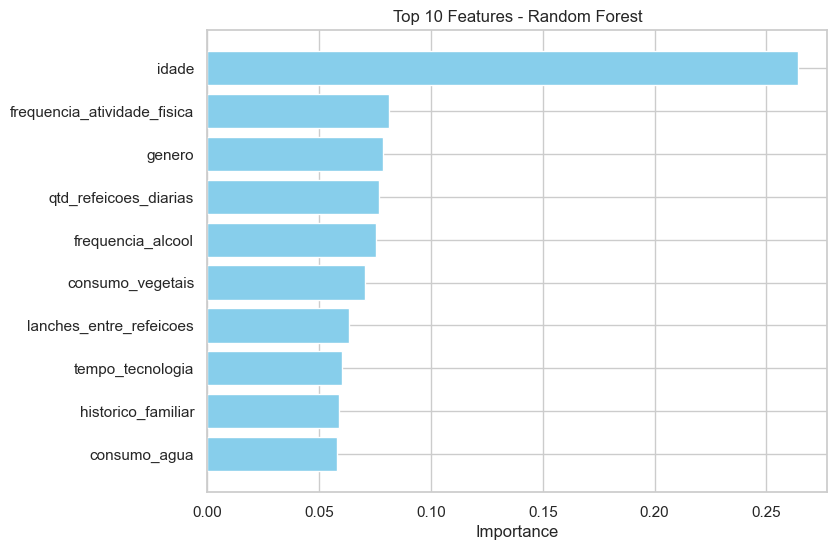

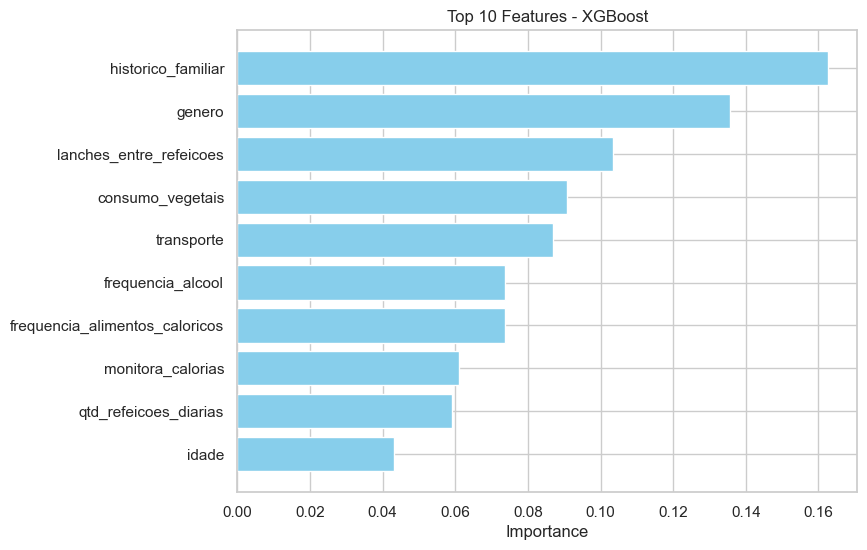

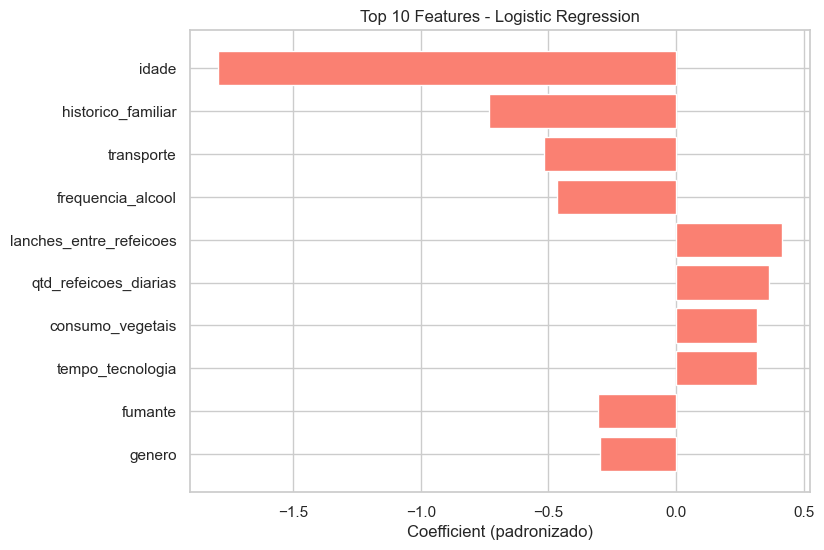

                    Feature  Coefficient
1                     idade    -1.794701
2        historico_familiar    -0.732925
13               transporte    -0.516634
12        frequencia_alcool    -0.466793
6   lanches_entre_refeicoes     0.414634
5     qtd_refeicoes_diarias     0.365016
4          consumo_vegetais     0.317766
11         tempo_tecnologia     0.316770
7                   fumante    -0.307249
0                    genero    -0.298180


In [263]:
# Lista de nomes reais das features
feature_names = [
    'genero', 'idade', 'historico_familiar',
    'frequencia_alimentos_caloricos', 'consumo_vegetais', 'qtd_refeicoes_diarias',
    'lanches_entre_refeicoes', 'fumante', 'consumo_agua', 'monitora_calorias',
    'frequencia_atividade_fisica', 'tempo_tecnologia', 'frequencia_alcool', 'transporte'
]


def plot_feature_importance(model, model_name, feature_names, top_n=10):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    else:
        print(f"{model_name} não possui atributo feature_importances_")
        return
    
    fi_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False).head(top_n)
    
    plt.figure(figsize=(8,6))
    plt.barh(fi_df['Feature'][::-1], fi_df['Importance'][::-1], color='skyblue')
    plt.xlabel("Importance")
    plt.title(f"Top {top_n} Features - {model_name}")
    plt.show()

plot_feature_importance(models['Random Forest'], "Random Forest", feature_names)
plot_feature_importance(models['XGBoost'], "XGBoost", feature_names)

# --- Coeficientes do Logistic Regression ---
lr_model = models['Logistic Regression']
coefficients = lr_model.coef_[0]

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False).head(10)

plt.figure(figsize=(8,6))
plt.barh(coef_df['Feature'][::-1], coef_df['Coefficient'][::-1], color='salmon')
plt.xlabel("Coefficient (padronizado)")
plt.title("Top 10 Features - Logistic Regression")
plt.show()

print(coef_df)

In [264]:
#Salvar o melhor modelo e o scaler
best_model = models[best_model_name]
joblib.dump(best_model, "modelo_obesidade.pkl")
joblib.dump(scaler, "scaler.pkl")

print("\nModelo e scaler salvos com sucesso!")


Modelo e scaler salvos com sucesso!


In [265]:
import os

os.makedirs("model", exist_ok=True)

# Codificação da variável alvo
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

joblib.dump(le_y, "model/label_y.pkl")

['model/label_y.pkl']

In [283]:
#Criar função para prever novos casos
def prever_obesidade(novos_dados: pd.DataFrame):
   

    model = joblib.load("modelo_obesidade.pkl")
    scaler = joblib.load("scaler.pkl")
    encoders = joblib.load("model/encoders.pkl")
    

    
    yes_no_cols = ["historico_familiar", "frequencia_alimentos_caloricos",
                   "fumante", "monitora_calorias"]
    for col in yes_no_cols:
        if col in novos_dados.columns:
            novos_dados[col] = novos_dados[col].astype(str).str.strip().str.lower()
            novos_dados[col] = novos_dados[col].map({'yes':1,'no':0})

    # Colunas de frequência
    freq_cols = ['lanches_entre_refeicoes', 'frequencia_alcool']
    freq_map = {'no':1, 'sometimes':2, 'frequently':3, 'always':4}
    for col in freq_cols:
        if col in novos_dados.columns:
            novos_dados[col] = novos_dados[col].astype(str).str.strip().str.lower()
            novos_dados[col] = novos_dados[col].map(freq_map)

    # Colunas categóricas restantes (usando capitalização original)
    for col, le in encoders.items():
        if col in novos_dados.columns:
            # Padronizar para string, sem lower
            novos_dados[col] = novos_dados[col].astype(str).str.strip()
            # Transformar usando encoder
            for val in novos_dados[col]:
                if val not in le.classes_:
                    raise ValueError(f"Valor '{val}' em coluna '{col}' não existia no treino!")
            novos_dados[col] = le.transform(novos_dados[col])

    # Padronizar
    novos_dados_scaled = scaler.transform(novos_dados)

    # Previsão
    pred = model.predict(novos_dados_scaled)[0]

    # Mapear para nome legível
    resultado = le_y.inverse_transform([pred])[0]
    return resultado



In [ ]:
#Exemplo de uso prático
novo_paciente = pd.DataFrame({
    "genero": ["Male"],
    "idade": [25],
    "historico_familiar": ["yes"],
    "frequencia_alimentos_caloricos": ["no"],
    "consumo_vegetais": [2],
    "qtd_refeicoes_diarias": [3],
    "lanches_entre_refeicoes": ["Sometimes"],
    "fumante": ["no"],
    "consumo_agua": [2],
    "monitora_calorias": ["no"],
    "frequencia_atividade_fisica": [1],
    "tempo_tecnologia": [2],
    "frequencia_alcool": ["Sometimes"],
    "transporte": ["Public_Transportation"]
})

resultado = prever_obesidade(novo_paciente)
print(f"\nPrevisão para novo paciente: {resultado}")



Previsão para novo paciente: 6


In [ ]:
df.to_csv("df.csv", index=False)